<a href="https://colab.research.google.com/github/howardgoff/BertQA/blob/master/ColabGettingStarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab / Kaggle Getting Started

I prefer to do my primary development in a Colab virtual machine but, competitions require your kernel to run on Kaggle for scoring. You can start with this notebook and add your own project code which should run in either location if you use the directory variables for file locations and correctly configure data and user libraries in Kaggle.<p>
The main differences are the file locations. On Colab you will symlink to a google Drive and for Kaggle you will need to upload your files as a .zip data file If you want SSH access there is code at bottom to allow this for Colab (not possible on Kaggle).<p>
If you run into problems or have suggestions I'd love to hear from you.

## Explanation

### Data & Directories
There are a couple of differences between Kaggle and Colab.<p>
**Colab** - Is a live linux system with nothing being persistant. You can attach a google drive to your kernel and/or download files from gs://, GitHub, Kaggle, etc. Using drive can have a performance penalty but is the easiest way to access persistent files.<br>
I am symlinking Library files and output files.<br>
Because my google drive space is limited I choose to download large data files each time the kernel is used.<p>
**Kaggle** - The kernel has a persistent ./input directory for data that is read only. You can attach data and library files there. (zip your files into a single file and upload the .zip).<br>
Your private ./lib directory can ba zipped and uploaded there as ./input/lib<br>
You can also create notebooks of kernel type "script" and then file->Add Utility Script in your competition notebook to attach the script files under ./usr/lib but you have to do this one file at a time. (see: https://www.kaggle.com/product-feedback/91185 for more information)<br>
I don't think competition scoring allows internet access so all files have to be attached to your notebook at submit time.

### User Libraries
**Colab** - you have a file system you can write to and if you need libraries you download them from somewhere. (eg. Google Dirve, Kaggle, GitHub)<br>
**Kaggle** - you have two options (internet connections are disabled during competition scoring):<p>
   * Add custom libraries to a dataset and include the dataset in your Kaggle kernel.<br>
   * Create a new kernel as a script, set it as a "Utility Script", add the kernel-script as a utility script in your competition kernel. The sctript will be linked to your kernel in the/kaggle/usr/lib directory (see: https://www.kaggle.com/product-feedback/91185 for more information) 

### SSH
You can SSH into the Colab. If you do this you can vim the ./lib files directly and they will be
persistant. Also, since all project and notebook ./lib files are in gdrive you can access all of them through any of your Colab kernels by using the gdrive directory.

### Switching between Colab & Kaggle
One way of moving your script from Colab to Kaggle to run is:<br>
   * delete all cells from your Kaggle competition notebook<br>
   * download the .ipynb from Colab<br>
   * upload it into the blank Kaggle notebook.<br>
   * delete the cells near the bottom of the notebook that need to be deleted when running on Kaggle<br>
   * update any script parameters (eg. verbose)
   * zip your current library files into a lib.zip and upload to your Kaggle dataset file
   * if you have changed ./data files make sure your Kaggle kernel has the current versions of those files

### Drectory Structure (Notebook)

* Kaggle &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <em>(cwd = /kaggle/working/)</em><br>
  {datadir} = /kaggle/input<br>
  {libdir} = /kaggle/input/lib &nbsp; &nbsp; &nbsp; (or /kaggle/usr/lib)<br>
  {outdir} = /kaggle/working<br>
* Colab &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <em>(cwd = /content/)</em><br>
  {datadir} = /content/data<br>
  {libdir} = /content/lib<br>
  {outdir} = /content/output<br>

#### - Required Libraries
   * {libdir}/lib_names.py

#### - Inputs (competition data)
   * {datadir}/{competition}/ (from: https://www.kaggle.com/_path_/)

#### - Required Data (additional packages)
   * {datadir}/kaggle-dataset (from https://www.kaggle.com/_user_/_dataset_/)

#### - Outputs
   * {outdir}/predictions.json
   * {outdir}/submission.csv<br>
   * {outdir}/eval.tf_record<br>
   * {outdir}/.ipynb_checkpoints/<br>

### Drectory Structure (Google Drive)
The following is the file structure for your google drive:<p>

/My Drive/Colab/ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <em>(this directory should be private)</em><br>
/My Drive/Colab/kaggle.json &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <em>(your personal Kaggle auth file)</em><br>
/My Drive/Colab/{projdir}/ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; (folder for a specific project/competition)<br>
/My Drive/Colab/{projdir}/{notebook}/&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;(individual notebook within project)<br>
/My Drive/Colab/{projdir}/{notebook}/notebook.ipynb<br>
/My Drive/Colab/{projdir}/{notebook}/lib/<br>
/My Drive/Colab/{projdir}/{notebook}/output/<br>
/My Drive/{projdir}/ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <em>(optional directory to be shared between teams)</em><br><p>
Using this directory structure and the variables in the config variables section below you can have any number of projects on your google drive and any number of notebook versions in each project. Each notebook can have a unique set of libraries.<p>
There is also a {nbver} which, if not '' is appended to the end of {outdir} and {libdir} offering additional flexibility if you want (if not just set it to ''}


### GitHub
As I learn more about GitHub I will add information here. But, I think you can choose to make repositaries out of either /My Drive/Colab/{projdir}/ or /My Drive/Colab/{projdir}/{notebook}/   <p>
You can then either pull/push to the shared repo directly from the Colab (using ssh, using %%bash commands in notebook or by linking the google Drive to your local machine and doing it from there.<p>
From within the Colab all files are in your google drive from the path /content/gdrive/My\ Drive/Colab/...

### - Notes
Put notes about your Notebook here







### - Credits / Ancestry
If your notebook is a fork or combination of other notebooks here you should provide links so other people can look at where you built your current work from.<p>
This notebook is a fork of [mmmarchetti's notebook](https://www.kaggle.com/mmmarchetti/tensorflow-2-0-bert-yes-no-answers) which was a fork of [prokaj's - bert joint baseline notebook](https://www.kaggle.com/prokaj/bert-joint-baseline-notebook/notebook).<br>
mmmarchetti made some modifications to slightly improve the code and get the YES / NO answers and leave the unknowns blank.

## Notebook Variables

In [0]:
CompSubmission = False                       # Set to True if submitting to Competition

In [0]:
## Turn this on for development to make sure library updates get reimported
#  will reduce performance so comment out for production.
%load_ext autoreload
%autoreload 2

In [0]:
## Helper Functions   (probably will move to a library eventually)
import os

# Custom Error Handler
class ExecutionStop(Exception):
    ''' forces notebook to stop with a raised exception '''
    def __init__(self, value): self.value=value
    def __str__(self): return(str(self.value))

#  Show list of file sand directories                 (it seems that this is skipping the symlinks)
def list_files(startpath, exclude=["/.config", "/gdrive"]):
    ''' Lists files in {startpath} optionally excluding {exclude} directories '''
    for root, _, files in os.walk(startpath, followlinks=True):
        if any([e in root for e in exclude]):
            continue
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")

def print_flags():
    ''' Prints the program config flags '''
    if verbose:
        print("\nParameters:")
        FLAGS = tf.flags.FLAGS
        for attr, obj in sorted(FLAGS.__flags.items()):
            print(f"{attr.upper()}={obj.value}")
        print("")

def del_all_flags(FLAGS):
    ''' Deletes all program flags '''
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)

# raise ExecutionStop("Message")

In [4]:
## Set file locations    (these variables are not implemented in the FLAGS code yet)
import os, sys
from pathlib import Path

## Config Variables
verbose = True if not CompSubmission else False  # Turn this off to supress some of the "fyi" output
competition = 'kaggle-competition_data'          # make this the name of the Kaggle comp dataset
train_file = ''                       # Set this below when you download the training file
test_file = ''                        # Set this below when you download the test file
projdir = 'projdir'                   # The project directory on Drive for this competition
notebook = 'GettingStarted'           # Subdir on Drive for files specific to this notebook
nbver = ''                            # library/output subfolder for this notebook version, or ''
DownloadBigFiles = True               # Files will not download if already on drive
EnableSMSMessages = False             # Allows notebook to attempt to send SMS alerts

if Path('/content').exists():
    print("Detected running on Colab")
    kernel = 'Colab'
    basedir = '/content'
    libdir = f"{basedir}/lib"
    datadir = f"{basedir}/data"
    outdir = f"{basedir}/output"      # will be symlinked to a user's private gdrive for persistence
elif Path('/kaggle').exists():
    print("Detected running on Kaggle")
    kernel = 'Kaggle'
    basedir = '/kaggle'
    libdir = f"{basedir}/input/lib"   # you will upload a {name}.zip file as a dataset
    datadir = f"{basedir}/input"      # this may need to be '../input' for scoring
    outdir = f"{basedir}/working"     # this may need to be '.' for scoring
else:
    raise ExecutionStop("Cannot continue without determining file locations")

Detected running on Colab


# ============= Machine Spinup =============

In [5]:
! zdump PST
if verbose:
    list_files(basedir)

PST  Thu Jan 16 12:58:30 2020 PST
content/
    sample_data/
        README.md
        anscombe.json
        california_housing_test.csv
        mnist_test.csv
        mnist_train_small.csv
        california_housing_train.csv


## -- Setup --

### Google Drive

In [6]:
## File link to Google Drive

######
##  WARNING: This is convienent but a rather bad idea from a security point of view. Mounting your
##           Google Drive in this way makes your entire drive accessible read/write and then you
##           are likely to run code from libraries that could be untrustable.
##           Possible alternatives would be to use read only file sharing links or if you want
##           read/write access (to allow file output for example) I would recommend creating a
##           special Google Drive account that only has files related to your Colab work.
######

if kernel == 'Colab':
    from google.colab import drive
    drive.mount(f"{basedir}/gdrive", force_remount=False)   # true to reread drive

    ## The file paths below will need to be adjusted and some folders/files will need to be 
    #  created on your gDrive to make the below mappings work.

    # this is a link to a team shared google folder (if needed)
    if False:
        if Path(f"{basedir}/{projdir}").is_symlink():
            ! rm "{basedir}/{projdir}"
        ! ln -s "{basedir}/gdrive/My Drive/{projdir}/" "{basedir}/{projdir}"
        if not Path(f"{basedir}/{projdir}").exists():
            raise ExecutionStop("Symlink to shared project directory not found!")

    ## If you do not want to use the lib directoy from your Google Drive set this block False
    if True:
        if Path(libdir).is_symlink():
            ! rm "{libdir}"
        ! ln -s "{basedir}/gdrive/My Drive/Colab/{projdir}/{notebook}/lib{nbver}/" "{libdir}"
        if not Path(libdir).exists():
            raise ExecutionStop("Project libdir directory not found!")

    ## If you do not want output to be written to your Google Drive set this block False
    if True:
        if Path(outdir).is_symlink():
            ! rm "{outdir}"
        ! ln -s "{basedir}/gdrive/My Drive/Colab/{projdir}/{notebook}/output{nbver}/" "{outdir}"
        if not Path(outdir).exists():
            raise ExecutionStop("Project outdir directory not found!")

    ## If you want to use data from gDrive set to True, if False this will download data
    #  To increase performance we are copying the data to locations on the VM
    #  Adjust file names/locations as needed for your project
    if False:
        altdatasrc = f"{basedir}/gdrive/My Drive/Colab/{projdir}/data"
        if not Path(f"{altdatasrc}/compdata.flag").exists():
            if not Path(f"{datadir}/compdata.flag").exists():      ## Don't do anything if flag exists
                print("\nGetting Competition Data From Google Drive")
                ! [ -d "{datadir}/{competition}" ] || mkdir -p "{datadir}/{competition}"
                ! cp "{altdatasrc}/{competition}/sample_submission.csv" "{datadir}/{competition}/"
                ! cp "{altdatasrc}/{competition}/simplified-nq-train.jsonl" "{datadir}/{competition}"
                ! cp "{altdatasrc}/{competition}/simplified-nq-test.jsonl" "{datadir}/{competition}"
                ! cp "{altdatasrc}/{competition}"/*.tfrecords "{datadir}/{competition}"
                ! touch "{datadir}/compdata.flag"
                train_file = f"{datadir}/{competition}/simplified-nq-train.jsonl"
                test_file = f"{datadir}/{competition}/simplified-nq-test.jsonl"
        else:
            raise ExecutionStop("Could not find compdata on Google Drive!")

        if not Path(f"{altdatasrc}/bertfiles.flag").exists():
            if not Path(f"{datadir}/bertfiles.flag").exists():      ## Don't do anything if flag exists
                print("Getting BERTjoint Model From Google Drive")
                ! [ -d "{datadir}/bert-joint-baseline" ] || mkdir -p "{datadir}/bert-joint-baseline"
                ! cp "{altdatasrc}/bert-joint-baseline"/* "{datadir}/bert-joint-baseline/"
                ! touch "{datadir}/bertfiles.flag"
        else:
            pass        # Getting bert data from Google is optional, it can be got later

    if verbose:
        print('\n', basedir)
        ! ls -lh "{basedir}"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive

 /content
total 12K
drwx------ 4 root root 4.0K Jan 16 12:58 gdrive
lrwxrwxrwx 1 root root   58 Jan 16 12:58 lib -> '/content/gdrive/My Drive/Colab/projdir/GettingStarted/lib/'
lrwxrwxrwx 1 root root   61 Jan 16 12:58 output -> '/content/gdrive/My Drive/Colab/projdir/GettingStarted/output/'
drwxr-xr-x 1 root root 4.0K Jan 13 16:38 sample_data


### SMS Messaging
<Details>You will need an account with http://twillio.com for this to work and have copied your auth API token tnto a file on your google drive.<p>
You will also need a json file with the following config information:<p>
```
{
"account_sid":"{your account_sid}",
"auth_token":"{your auth_token}",
"send_to":"+1{delivery number}",
"send_from":"+1{your twilio number}"
}
```
</Details>

In [0]:
if EnableSMSMessages and kernel == 'Colab':
    ! pip3 install twilio > /dev/null
    from twilio.rest import Client as TC
    import json
    twil_file = f"{basedir}/gdrive/My Drive/Colab/twilio.json" 
    if Path(twil_file).exists():
        # if there is a twilio.json file in gdrive use it
        with open(twil_file, 'r') as f:
            twil_auth = json.load(f)

        account_sid = twil_auth["account_sid"]
        auth_token  = twil_auth["auth_token"]

        sms = TC(account_sid, auth_token)
    else:
        sms = None
else:
    sms = None

def sms_message(str_msg):
    ''' Sends messages through sms gateway to notify user of alerts.
        If not enabled calls to sms_message() will silently do nothing.
        For this to work you need an account at https://www.twilio.com/
        Config through a twilio.json file (called above) that must contains
        {account_sid, auth_token, send_to, send_from}
    '''
    if sms is not None:
        message = sms.messages.create(
            to=twil_auth['send_to'], 
            from_=twil_auth['send_from'],
            body=str_msg)
        if message.error_message is not None:
            print(f"\nSMS Error: {message.error_message}")

sms_message("Twilio SMS gateway from Colab enabled")

### Kaggle API
<Details>You will need Kaggle API token to link the Colab instance to your Kaggle account to get data, etc.<br>
Go to: https://www.kaggle.com/yourID/account and click on the "Create New API Token: button to get a file named kaggle.json.<p>You can put your kaggle.json file in your google drive at My Drive/colab/kaggle.json.<br>
Alternately, you can store it on your local machine and the script will ask you to upload it.</Details>

In [8]:
## Link to Kaggle
if kernel == 'Colab':
    from google.colab import files
    if Path(f"{basedir}/gdrive/My Drive/Colab/kaggle.json").exists():
        # if there is a kaggle.json file in gdrive use it
        os.environ['KAGGLE_CONFIG_DIR'] = f"{basedir}/gdrive/My Drive/Colab/"
        ! ls -lh "{basedir}/gdrive/My Drive/Colab/kaggle.json"
    else:
        # Have user upload file
        print('Upload kaggle.json.')
        # The files.upload() command is failing sporatically with:
        #   TypeError: Cannot read property '_uploadFiles' of undefined (just run this cell again)
        ! rm "{basedir}/kaggle.json"  2> /dev/null
        files.upload()
        ! chmod 600 kaggle.json
        os.environ['KAGGLE_CONFIG_DIR'] = f"{basedir}/"
        ! ls -lh "{basedir}/kaggle.json"
    # import kaggle                           # gives us access to kaggle.api
    # help(kaggle)

-rw------- 1 root root 66 Dec 15 08:31 '/content/gdrive/My Drive/Colab/kaggle.json'


## -- Main System Config --
<Details><Summary>Global Config</Summary>
Put any global system configuration here

In [0]:
if kernel == "Colab":
    if Path(f"{basedir}/sample_data").exists():
        ! rm -rf "{basedir}/sample_data"

In [0]:
%%bash -s "{libdir}" "{datadir}" "{outdir}"
# make directories if not already exist
[ -d "$1" ] || mkdir -p "$1"        # {libdir}
[ -d "$2" ] || mkdir -p "$2"        # {datadir}
[ -d "$3" ] || mkdir -p "$3"        # {outdir}

In [0]:
import sys, os
if not libdir in sys.path:                       # don't add multiple times
    sys.path.append(libdir)
if not (libdir in os.environ['PYTHONPATH']):     # needed to run python scripts from shell
    os.environ['PYTHONPATH'] += f":{libdir}"

In [12]:
if verbose:
    !pwd
    !ls -lh
    print('', "sys.path:", *sys.path, '', sep='\n')
    !printenv |grep -E 'KAGGLE|PYTHON'
    print()
! zdump PST

/content
total 12K
drwxr-xr-x 2 root root 4.0K Jan 16 12:59 data
drwx------ 4 root root 4.0K Jan 16 12:58 gdrive
lrwxrwxrwx 1 root root   58 Jan 16 12:58 lib -> '/content/gdrive/My Drive/Colab/projdir/GettingStarted/lib/'
lrwxrwxrwx 1 root root   61 Jan 16 12:58 output -> '/content/gdrive/My Drive/Colab/projdir/GettingStarted/output/'

sys.path:

/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
/content/lib

KAGGLE_CONFIG_DIR=/content/gdrive/My Drive/Colab/
PYTHONWARNINGS=ignore:::pip._internal.cli.base_command
PYTHONPATH=/env/python:/content/lib

PST  Thu Jan 16 12:59:14 2020 PST


# =========== Project Specific Setup ===========

### Download Dataset and Support Files

Kaggle Competition Files<br>
Here is an example of downlaoding and unpacking competition data. If the competition set has different files you will need to adjust.

In [13]:
## Competition Dataset  (5GB zipped)
if DownloadBigFiles and kernel == 'Colab':
    if not Path(f"{datadir}/compdata.flag").exists():      ## Don't download again if exists
        ## comp data might exist from previous run or because you copied it from gDrive
        #  Adjust file names as needed
        print("Downloading Competition Data\n")
        ! kaggle competitions download -c "{competition}" -p "{datadir}"
        ! mkdir -p "{datadir}/{competition}/"
        ! mv "{datadir}/sample_submission.csv"  "{datadir}/{competition}"
        ! unzip "{datadir}/simplified-nq-train.jsonl.zip" -d "{datadir}/{competition}"
        ! rm "{datadir}/simplified-nq-train.jsonl.zip"
        ! unzip "{datadir}/simplified-nq-test.jsonl.zip" -d "{datadir}/{competition}"
        ! rm "{datadir}/simplified-nq-test.jsonl.zip"
        ! touch "{datadir}/compdata.flag"
    else:
        print("Competition Data already exists. Not downloading.\n")
        !ls -lh "{datadir}/{competition}"/*
    train_file = f"{datadir}/{competition}/simplified-nq-train.jsonl"
    test_file = f"{datadir}/{competition}/simplified-nq-test.jsonl"
else:
    print("For Kaggle, make sure you download a copy of the competition data into your kernel")
    ! ls -lh "{datadir}/{competition}"/*
    train_file = f"{datadir}/{competition}/simplified-nq-train.jsonl"
    test_file = f"{datadir}/{competition}/simplified-nq-test.jsonl"

    # public_dataset = os.path.getsize(f"{test_file}") < 20_000_000
    # private_dataset = os.path.getsize(f"{test_file}") >= 20_000_000


404 - Not Found
mv: cannot stat '/content/data/sample_submission.csv': No such file or directory
unzip:  cannot find or open /content/data/simplified-nq-train.jsonl.zip, /content/data/simplified-nq-train.jsonl.zip.zip or /content/data/simplified-nq-train.jsonl.zip.ZIP.
rm: cannot remove '/content/data/simplified-nq-train.jsonl.zip': No such file or directory
unzip:  cannot find or open /content/data/simplified-nq-test.jsonl.zip, /content/data/simplified-nq-test.jsonl.zip.zip or /content/data/simplified-nq-test.jsonl.zip.ZIP.
rm: cannot remove '/content/data/simplified-nq-test.jsonl.zip': No such file or directory


Additional Data Files<br>
Here is an example of downlaoding and unpacking additional data files.

In [14]:
## Get BERTjoint model files (this a copy of the prokaj file from my Google Drive)
#  You will need to adjust file names and paths to get any required files for your project
if DownloadBigFiles and kernel == 'Colab':
    if not Path(f"{datadir}/bertfiles.flag").exists():      ## Don't download again if exists
        print("Downloading BERT-joint Model\n")
        ! mkdir -p "{datadir}/bert-joint-baseline/"
        filestoget = "bert_config* model_cpkt* nq-test* vocab*"
        ! kaggle datasets download -d prokaj/bert-joint-baseline -p "{datadir}"
        ! unzip "{datadir}/bert-joint-baseline.zip" {filestoget} -d "{datadir}/bert-joint-baseline/"
        ! rm "{datadir}/bert-joint-baseline.zip"
        if Path(f"{datadir}/bert-joint-baseline-output.npz").exists():
            ! rm "{datadir}/bert-joint-baseline-output.npz" # if kaggle downloaded this delete it
        if verbose:
            ! ls -lh "{datadir}/bert-joint-baseline/"
        ! touch "{datadir}/bertfiles.flag"
    else:
        print("BERT-joint Files already exists. Not downloading.\n")
        ! ls -lh "{datadir}/bert-joint-baseline/"
else:
    print("For Kaggle, make sure you download a copy of prokaj's bert-joint-baseline to your kernel")
    ! ls -lh "{datadir}/bert-joint-baseline/"


 98% 1.51G/1.53G [00:36<00:00, 41.5MB/s]
100% 1.53G/1.53G [00:36<00:00, 45.0MB/s]
Archive:  /content/data/bert-joint-baseline.zip
  inflating: /content/data/bert-joint-baseline/bert_config.json  
  inflating: /content/data/bert-joint-baseline/model_cpkt-1.data-00000-of-00002  
  inflating: /content/data/bert-joint-baseline/model_cpkt-1.data-00001-of-00002  
  inflating: /content/data/bert-joint-baseline/model_cpkt-1.index  
  inflating: /content/data/bert-joint-baseline/nq-test.tfrecords  
  inflating: /content/data/bert-joint-baseline/vocab-nq.txt  
total 1.3G
-rw-r--r-- 1 root root  314 Nov 17 15:02 bert_config.json
-rw-r--r-- 1 root root  78K Nov 17 15:02 model_cpkt-1.data-00000-of-00002
-rw-r--r-- 1 root root 1.3G Nov 17 15:02 model_cpkt-1.data-00001-of-00002
-rw-r--r-- 1 root root  29K Nov 17 15:05 model_cpkt-1.index
-rw-r--r-- 1 root root  30M Nov 17 15:05 nq-test.tfrecords
-rw-r--r-- 1 root root 227K Nov 17 15:06 vocab-nq.txt


### Library Setup

Custom libraries are uploaded to google Drive and symlinked if on Colab and zipped and<br>
uploaded to a dataset if on Kaggle.

In [15]:
# if you need to move/copy any lib files to final locations do it here
if kernel == 'Colab':
    pass
if kernel == 'Kaggle':
    pass

if verbose:
    print(f"{libdir}/")
    ! ls -lh "{libdir}"/*

/content/lib/
ls: cannot access '/content/lib/*': No such file or directory


In [16]:
## Load Libraries
import os, sys, importlib
from pprint import pprint

if kernel == "Colab":               # Kaggle is V2 by default
    #magic to make Colab path to Tensorflow V2 on Colab
    %tensorflow_version 2.x 

import tensorflow as tf
from tensorflow import keras as tk
from tensorflow.keras import layers as tkl
print("TensofFlow", tf.__version__)

import numpy as np
import pandas as pd
import collections
import json

TensorFlow 2.x selected.
TensofFlow 2.1.0-rc1


In [17]:
! zdump PST
if verbose:
    list_files(basedir)

PST  Thu Jan 16 13:00:42 2020 PST
content/
    data/
        compdata.flag
        bertfiles.flag
        kaggle-competition_data/
        bert-joint-baseline/
            bert_config.json
            model_cpkt-1.data-00000-of-00002
            nq-test.tfrecords
            model_cpkt-1.data-00001-of-00002
            vocab-nq.txt
            model_cpkt-1.index
    lib/
    output/
        main_model_1.h5
        main_model_2.h5
        main_model_4.h5
        main_model.h5
        model_checkpoint.data-00001-of-00002
        model_checkpoint.data-00000-of-00002
        model_checkpoint.index
        checkpoint


In [0]:
# raise ExecutionStop("Execution stopped")

# =========== Project Code ===========

Note: The Keras code here is not tuned or intended to create correct predictions.<br>
It is just here to show the steps and syntax of a sample program.

## -- Load Data --

Data can be delivered in a numpy array. In TF2, tf.data provides for loading and preprocesing data<br>
in a way that is fast and scalable. see: https://www.tensorflow.org/guide/data  <font color='red'>\<--Read This</font>

<Details><Summary>Data Label Description</Summary>
<blockquote>
            0	T-shirt/top<br>
            1	Trouser<br>
            2	Pullover<br>
            3	Dress<br>
            4	Coat<br>
            5	Sandal<br>
            6	Shirt<br>
            7	Sneaker<br>
            8	Bag<br>
            9	Ankle boot<br>
</blockquote>
</Details>

In [19]:
## if your dataset is small and fits into memory you should use Numpy arrays or tf.data Datasets
(X_train, y_train), (X_test, y_test) = tk.datasets.mnist.load_data()

## Preprocess the data
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

## You can tell fit to reserve a percentage of training data for validation or provide explicit 
#  validation data. If you use validation_split fit will take that percentage off the end of
#  training data before shuffling it.
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]


11493376/11490434 [==============================] - 0s 0us/step


# -- Define Model --

Model: "main_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________



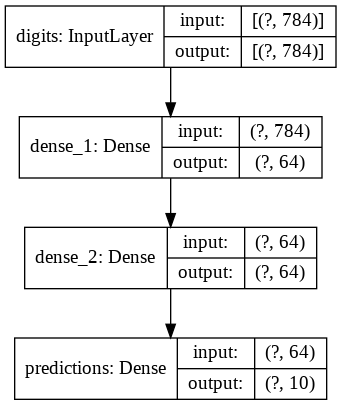

In [20]:
tk.backend.clear_session()     ## Reset Notebook

## Define Layers
inputs_1 = tk.Input(shape=(784,), name='digits')
dense_1 = tkl.Dense(64, activation='relu', name='dense_1')(inputs_1)
dense_2 = tkl.Dense(64, activation='relu', name='dense_2')(dense_1)
outputs_1 = tkl.Dense(10, activation='softmax', name='predictions')(dense_2)

## Define Model
model = tk.Model(inputs=inputs_1, outputs=outputs_1, name='main_model')

## Print informaiton about model
model.summary()
print()
tk.utils.plot_model( model,
                     to_file='main_model.png',
                     show_shapes=True,
                     show_layer_names = True,
                     rankdir = 'TB',            # TB creates vertical; LR creates horizontal
                     expand_nested = True,     # expand nested models into clusters
                     dpi = 96
                    )

## To evaluate layers
# layer.shape
# layer.dtype


## -- Compile Model --

<Details><Summary>Optimizer, Loss & Metric values</Summary>
Supported optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
 * SGD() with or without momentum
 * RMSprop()
 * Adam()

Supported loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/losses
 * binary_crossentropy - binary classification
 * sparse_categorical_crossentropy - multi-class classification
 * mean_squared_error -  regression
 * cosine_similarity
 * you can define custom loss functions

Supported metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics
 * acu
 * precision
 * recall

 </Detail>

In [0]:
## learning rate can be static, a schedule, or dynamic based on results
learing_rate = 1e-3
learning_rate = tk.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = 0.1,
                decay_steps = 100000,
                decay_rate = 0.96,
                staircase = True
               )

model.compile( optimizer = tk.optimizers.RMSprop(learning_rate = learning_rate),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['sparse_categorical_accuracy']
              )


# -- Fit Model -- 

When you are training models on relatively large datasets it is crucial to save checkpoints of<br>
your model at frequent intervals. The easiest way is to use the ModelCheckpoint callback.

In [0]:
callbacks = [
    tk.callbacks.ModelCheckpoint(
        filepath = f"{outdir}/"+'main_model_{epoch}.h5',
        monitor = 'val_loss',
        save_best_only = True,          # overwrite current only if val_loss has improved
        verbose = 1
        ),
    tk.callbacks.EarlyStopping(         ## Early stopping can prevent overfitting
        monitor = 'val_loss',
        #min_delta =,                   # change less than this will count as none
        patience = 5,                   # number of epochs that produced no improvement
        restore_best_weights = True     # go back to best values at end
        )
           ]

Train the model by slicing the data into "batches" of size batch_size, and repeatedly<br>
iterating over the entire dataset for a given number of "epochs"

In [23]:
## you can also pass model.fit() validation_split rather than manually splitting the data set
#  input can be a dict if model has named inputs
history = model.fit( X_train,               # array/list of arrays (if model has multiple inputs)
                     y_train,               # array/list of arrays (if model has multiple outputs)
                     batch_size = 64,       # defaults to 32
                     epochs = 5,
                     shuffle = True,        # shuffles before each epoch
                     # validation_split = 0.2,      # only works with numpy data
                     validation_data = (X_val, y_val),
                     validation_freq = 1,   # how many training epochs to run between validations
                     callbacks = callbacks, # None or list of callbacks to apply
                     # class_weight         # pay more attention to underrepresented classes
                     # use_multiprocessing = False,
                     # workers = 1,
                     # max_queue_size       # used if input data is a sequence or generator
                     verbose = 2            # 0 = off; 1 = progress bar; 2 = one line per epoch
                    )

print('\nHistory Dict:')
pprint(history.history)


Train on 50000 samples, validate on 10000 samples
Epoch 1/5

Epoch 00001: val_loss improved from inf to 1.80893, saving model to /content/output/main_model_1.h5
50000/50000 - 5s - loss: 2.5223 - sparse_categorical_accuracy: 0.3260 - val_loss: 1.8089 - val_sparse_categorical_accuracy: 0.2818
Epoch 2/5

Epoch 00002: val_loss did not improve from 1.80893
50000/50000 - 2s - loss: 1.9050 - sparse_categorical_accuracy: 0.2859 - val_loss: 1.8354 - val_sparse_categorical_accuracy: 0.2169
Epoch 3/5

Epoch 00003: val_loss did not improve from 1.80893
50000/50000 - 2s - loss: 1.7522 - sparse_categorical_accuracy: 0.3254 - val_loss: 1.8269 - val_sparse_categorical_accuracy: 0.2894
Epoch 4/5

Epoch 00004: val_loss did not improve from 1.80893
50000/50000 - 2s - loss: 1.8806 - sparse_categorical_accuracy: 0.2781 - val_loss: 1.8707 - val_sparse_categorical_accuracy: 0.2781
Epoch 5/5

Epoch 00005: val_loss did not improve from 1.80893
50000/50000 - 2s - loss: 1.8473 - sparse_categorical_accuracy: 0.28

 # -- Evaluate Model --

In [24]:
loss, accuracy = model.evaluate( X_test,   # array or list of arrays (if model has multiple inputs)
                                 y_test,   # array or list of arrays (if model has multiple outputs)
                                 batch_size = 128,     # defaults to 32
                                 callbacks = None,
                                 # use_multiprocessing = False,
                                 # workers = 1,
                                 verbose = 1   # 0 = off; 1 = progress bar
                                )

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


10000/10000 [==============================] - 0s 18us/sample - loss: 1.8545 - sparse_categorical_accuracy: 0.2547
Test loss: 1.8545054027557373
Test accuracy: 0.2547000050544739


In [0]:
## -- Create Checkpoint --

Checkpoints capture the exact values of all parameters used by the model.<br>
They do not contain any description of the computation defined by the model.

In [0]:
model.save_weights(f"{outdir}/model_checkpoint")

## -- Save Model --

Saving a whole model (avaialble with simple and functional API models) you can recreate the model<br> later even if you do not have the code that created the model. The file includes: model architecture, model weight values; model training config; the optimizer and its state (if any) so you can restart training where you left off.

In [0]:
predictions = model.predict(X_test)
model.save(f"{outdir}/model_save.h5")
del model

# Recreate the exact same model purely from the save file
model = tk.models.load_model(f"{outdir}/model_save.h5")
new_predictions = model.predict(X_test)

# verify that the predictions are the same
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-5)

Notes on saving other formats: https://www.tensorflow.org/guide/keras/save_and_serialize#export_to_savedmodel

# -- Make Predictions --

In [28]:
predictions = model.predict( X_test[:3],            # for now only predict on first 3
                             batch_size = 32,       # defaults to 32
                             callbacks = None,
                             # use_multiprocessing = False,
                             # workers = 1,
                             verbose = 1            # 0 or 1
                            )

np.set_printoptions(suppress=True, precision=1)
print(predictions)


3/3 [==============================] - 0s 873us/sample
[[0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.1 0.  0.2 0.1 0.  0.2 0.2 0.  0.1 0.1]
 [0.  0.2 0.1 0.  0.2 0.  0.  0.  0.  0.2]]


#&gt;&gt; Deleted to end before submitting to competition &lt;&lt;
<Details> This is the end of the project notebook. The rest of this notebook is helpful for<br>
development but should not be submitted to competition</Details>

In [29]:
# Make sure user does not accedentially execute beyond end
raise ExecutionStop("Stopping execution")

ExecutionStop: ignored

# ====== Development Support Files (safe to ignore) =====

### SSH Setup
This is only neeeded if you want to log into the Colab machine. Otherwise fold it up and ignore.<br>
To use it you have to create a login at https://ngrok.com
<Details>Thanks to Imad El Hanafi (https://imadelhanafi.com) for showing me how to do this.<p>
You will need to create a free account at https://ngrok.com/ for the SSH tunnel to work.</Details>

File paths are hard coded here because this may be run before program variables are established.

In [0]:
## if you want to use the Kaggle api from command line you will need a kaggle.json file
from pathlib import Path
if Path('/content/gdrive/My Drive/Colab/kaggle.json').exists() or \
                                    Path('/content/kaggle.json').exists():
    pass    # we found a kaggle.json file
else:
    # Give user opportunity to upload a kaggle.json file
    from google.colab import files
    print('Upload kaggle.json if you want the Kaggle API to be availabel in bash.')
    # The files.upload() command is failing sporatically with:
    #   TypeError: Cannot read property '_uploadFiles' of undefined (just run this cell again)
    ! rm "/content/kaggle.json"  2> /dev/null
    files.upload()

In [0]:
%%bash
## Install sshd; Set to allow login and config
apt-get install -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
mkdir -p /var/run/sshd
echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config

# set host key to known value (need to test if exist)
gdown -O "/etc/ssh/ssh_host_rsa_key" --id 17Vp-rLM0kLVsIqxo7GkV3YXibGCJ7WCR
chown 600 "/etc/ssh/ssh_host_rsa_key"    # private key will be ignored if not secure
gdown -O "/etc/ssh/ssh_host_rsa_key.pub" --id 1-5yW1EwMdBN0YlRe7McmwDxzmGyvq-gW
# get script to modify login shell to match env of Notebook
gdown -O "/root/init_shell.sh" --id 1-9s5wuq5TkebgKbFvBYy4EeM8c2Ee0xc

# this script will give fix the login shell so Python will work
if [ -f "/root/init_shell.sh" ]; then
    echo "source /root/init_shell.sh" >> /root/.bashrc
fi

In [0]:
## setup ssh user / pass and start sshd

#Generate a random root password
import random, string
sshpass = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(30))

#Set root password
! echo root:$sshpass | chpasswd

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

In [0]:
%%bash
## Get Ngrok from gdrive or try to download (see: https://ngrok.com/download)
if [ -f "/content/bertqa/colab/ngrok-stable-linux-amd64.zip" ]; then
    cp "/content/bertqa/colab/ngrok-stable-linux-amd64.zip" .
    echo "Using ngrok-stable-linux-amd64.zip from gdrive"
else
    wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
fi
unzip -qq -n ngrok-stable-linux-amd64.zip
rm ngrok-stable-linux-amd64.zip

In [0]:
## Get user to enter auth token from ngrok and start tunnel

# Get token from ngrok for the tunnel
print("Get your authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')

#### ===============================<br> ||====&nbsp;&nbsp;  SSH Login Credentials &nbsp;&nbsp;====||<br> ===============================

In [0]:
#@title
print("username: root")
print("password: ", sshpass)

Get the host name and port number at: https://dashboard.ngrok.com/status

```bash
ssh root@0.tcp.ngrok.io -p [ngrok_port]
Login as: root
Servrer refused our key
root@0.tcp.ngrok.io's password: [see above]

(Colab):/content$
```


Install programs

In [0]:
%%bash
# vim
apt-get install vim > /dev/null
echo "set tabstop     =4" >> ~/.vimrc
echo "set softtabstop =4" >> ~/.vimrc
echo "set shiftwidth  =4" >> ~/.vimrc
echo "set expandtab"      >> ~/.vimrc

# js is a JSON processor
apt-get install js > /dev/null

apt-get install tree > /dev/null


If you need to kill Ngrok run this cell

In [0]:
if False:
    !kill $(ps aux | grep './ngrok' | awk '{print $2}')

Check out your GPU and RAM status

In [0]:
# memory footprint support libraries/code
! ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
! pip install gputil    > /dev/null
! pip install psutil    > /dev/null
! pip install humanize  > /dev/null
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm() # If your utilization is not 0% you are probably sharing with someone at the moment

## -- Misc Notes --

### Prevent Disconnects
Colab periodically disconnects the browser.<br>
You have to save model checkpoints to Google Drive so you don't lose work<br>
See: https://mc.ai/google-colab-drive-as-persistent-storage-for-long-training-runs/<br>
Something to try...<br>
Ctrl+Shift+i in browser and in console run this code...
```
function KeepAlive(){
    console.log("Maintaining Connection");
    document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(KeepAlive,60000);
```
There have been reports of people having their GPU privileges suspended for letting processes run for over 12 hours. It seems that they may penalize you rather than just cutting you off.

### Monitor GPU
```
# From cli I think to monitor GPU while fiting
$ nvidia-smi dmon
$ nvidia-smi pmon
```

### Code From Elsewhere

In [0]:
raise ExecutionStop("Stop Here")

In [0]:
!nvidia-smi -i 0 -q -d MEMORY,UTILIZATION,POWER,CLOCK,COMPUTE

In [0]:
%%bash
## Convert notebook to HTML or PDF for printing

### Clear All Output & Save Before Doing This ###

apt-get install texlive texlive-xetex texlive-latex-extra mandoc > /dev/null
pip install pypandoc
# jupyter nbconvert --to HTML /content/gdrive/My\ Drive/Colab/bertqa/BERTjoint_yes_no/BERTjoint\ yes\ no2.ipynb
jupyter nbconvert --to HTML /content/gdrive/My\ Drive/bertqa/BERTjoint_yes_no/BERTjoint\ yes\ no2.1.ipynb

# ============ Notes / Eratta ============